<a href="https://colab.research.google.com/github/data-aleks/scottishmunros_tidytuesday_19_08_2025/blob/main/tidy_tuesday_18_08_2025_ScottishMunros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import math
import requests
import folium
from pyproj import Transformer

# **Scottish Munros**

A Munro is a Scottish mountain with an elevation of over 3,000 feet, whereas a Munro Top is a subsidiary summit of a Munro that also exceeds 3,000 feet in height but is not considered a distinct mountain in its own right. The most famous Munro is Ben Nevis.

In 1891, Sir Hugh Munro produced the first list of these hills. However, unlike other classification schemes in Scotland which require a peak to have a prominence of at least 500 feet for inclusion, the Munros lack a rigid set of criteria for inclusion. And so, re-surveying can lead to changes in which peaks are included on the list.

-  How many peaks currently listed as Munros have always been included on the list?
-  Which year saw the largest number of changes to the classification?
-  Which Munro is the most remote?

The Database of British and Irish Hills is licensed under a Creative Commons Attribution 4.0 International Licence. Please reference The Database of British and Irish Hills v18.2 and link to www.hills-database.co.uk.

Thank you to Nicola Rennie for curating this week's dataset.

Load the dataset from the link provided in the TidyTuesday.

In [2]:
scottish_munros = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-08-19/scottish_munros.csv', encoding='ISO-8859-1')

Check if dataset is loaded succesfully.

In [3]:
if scottish_munros.empty:
  print('Dataset could not be fetched')
else:
  print('Scottish Munros Dataset Loaded Succesfully')

Scottish Munros Dataset Loaded Succesfully


## **Step 1**. Explore the data

In [4]:
scottish_munros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DoBIH_number  604 non-null    object 
 1   Name          603 non-null    object 
 2   Height_m      603 non-null    float64
 3   Height_ft     603 non-null    float64
 4   xcoord        603 non-null    float64
 5   ycoord        603 non-null    float64
 6   1891          538 non-null    object 
 7   1921          543 non-null    object 
 8   1933          543 non-null    object 
 9   1953          543 non-null    object 
 10  1969          543 non-null    object 
 11  1974          541 non-null    object 
 12  1981          517 non-null    object 
 13  1984          517 non-null    object 
 14  1990          517 non-null    object 
 15  1997          511 non-null    object 
 16  2021          508 non-null    object 
 17  Comments      283 non-null    object 
dtypes: float64(4), object(14)
memo

In [5]:
scottish_munros.isnull().sum()

,0
DoBIH_number,0
Name,1
Height_m,1
Height_ft,1
xcoord,1
ycoord,1
1891,66
1921,61
1933,61
1953,61


In [6]:
scottish_munros.head()

,DoBIH_number,Name,Height_m,Height_ft,xcoord,ycoord,1891,1921,1933,1953,1969,1974,1981,1984,1990,1997,2021,Comments
0,1,Ben Chonzie,931.0,3054.0,277324.0,730857.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN
1,17,Ben Vorlich,985.3,3233.0,262912.0,718916.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN
2,18,Stuc a' Chroin,973.0,3192.0,261746.0,717465.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN
3,32,Ben Lomond,973.7,3195.0,236707.0,702863.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN
4,26,Ben More,1174.0,3852.0,243276.0,724417.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN


In [7]:
scottish_munros.tail()

,DoBIH_number,Name,Height_m,Height_ft,xcoord,ycoord,1891,1921,1933,1953,1969,1974,1981,1984,1990,1997,2021,Comments
599,1258,Sgurr nan Eag,926.3,3039.0,145705.0,819536.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN
600,1255,Blabheinn [Bla Bheinn],929.0,3048.0,152990.0,821743.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,"1891: Blath Bheinn (Blaven), N Top; 1921-1969:..."
601,1257,Blabheinn South Top,926.5,3040.0,152855.0,821529.0,Munro Top,NaN,NaN,NaN,NaN,NaN,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,"1891: Blath Bheinn (Blaven), S Top; 1981-1990:..."
602,1301,Ben More,966.0,3169.0,152576.0,733078.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN
603,Ten-figure grid references suitable for Garmin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
scottish_munros[scottish_munros['Name'].isna()]

,DoBIH_number,Name,Height_m,Height_ft,xcoord,ycoord,1891,1921,1933,1953,1969,1974,1981,1984,1990,1997,2021,Comments
603,Ten-figure grid references suitable for Garmin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Step 2**. Cleaning Data

In this step i will clean up our data. There is couple things i would like to do with this dataset. **First** there the last row of the data is not related to our data, and we will remove this. **Second** we have a comments column which has quite a few empty values, we will remove this aswell as it has no value to us. **Third** there is quite a few NA values in the classification of the tops which i think can be replaced with Unclassified to keep missing values to a minimum. **Fourth** i like to keep column names lowercase.

First let's make a copy of our dataset

In [9]:
df_cleaning = scottish_munros.copy()

### **Step 2.1** Removing Last Row Which Contains No data



In [10]:
df_cleaning = df_cleaning.dropna(subset=['Name'])

In [11]:
df_cleaning.tail()

,DoBIH_number,Name,Height_m,Height_ft,xcoord,ycoord,1891,1921,1933,1953,1969,1974,1981,1984,1990,1997,2021,Comments
598,1252,Sgurr Dubh Mor - Sgurr Dubh an Da Bheinn,938.0,3077.0,145521.0,820462.0,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,1891: Sgurr Dubh (W Peak); 1921-1990 Sgurr Dub...
599,1258,Sgurr nan Eag,926.3,3039.0,145705.0,819536.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN
600,1255,Blabheinn [Bla Bheinn],929.0,3048.0,152990.0,821743.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,"1891: Blath Bheinn (Blaven), N Top; 1921-1969:..."
601,1257,Blabheinn South Top,926.5,3040.0,152855.0,821529.0,Munro Top,NaN,NaN,NaN,NaN,NaN,Munro Top,Munro Top,Munro Top,Munro Top,Munro Top,"1891: Blath Bheinn (Blaven), S Top; 1981-1990:..."
602,1301,Ben More,966.0,3169.0,152576.0,733078.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,NaN


### **Step 2.2** Removing 'Comments' Column

In [12]:
df_cleaning.drop('Comments', axis=1, inplace=True, errors='ignore')

In [13]:
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Index: 603 entries, 0 to 602
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DoBIH_number  603 non-null    object 
 1   Name          603 non-null    object 
 2   Height_m      603 non-null    float64
 3   Height_ft     603 non-null    float64
 4   xcoord        603 non-null    float64
 5   ycoord        603 non-null    float64
 6   1891          538 non-null    object 
 7   1921          543 non-null    object 
 8   1933          543 non-null    object 
 9   1953          543 non-null    object 
 10  1969          543 non-null    object 
 11  1974          541 non-null    object 
 12  1981          517 non-null    object 
 13  1984          517 non-null    object 
 14  1990          517 non-null    object 
 15  1997          511 non-null    object 
 16  2021          508 non-null    object 
dtypes: float64(4), object(13)
memory usage: 84.8+ KB


### **Step 2.3** Replacing NA values in classification

Now this is the tricky part. While there is missing values with classification in some records does this mean that these are Unclassified? Or has the classificaiton remained the same? I think the best approach rather than marking NA values as unclassified across the board is to approach it in the way where we will forward fill the classification value, for example if a munro has been classified in 1891 but the rest of the data columns are NA it perhaps would be better to assume that it is still classified the same way. We will deal with records that was first classified in for example year 1974 and had no classification prior to that by filling these as Unclassified.

In [14]:
df_cleaning[df_cleaning['1953'].isna()]

,DoBIH_number,Name,Height_m,Height_ft,xcoord,ycoord,1891,1921,1933,1953,1969,1974,1981,1984,1990,1997,2021
7,39,Stob Binnein - Creag a' Bhragit,923.00,3028.0,244847.0,722468.0,Munro Top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,30,Cruach Ardrain,1045.90,3431.0,240927.0,721215.0,Munro,NaN,NaN,NaN,NaN,NaN,Munro,Munro,Munro,Munro,Munro
11,40,Cruach Ardrain - Stob Garbh SE Top,923.50,3030.0,241285.0,721716.0,Munro Top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,2925,Beinn a' Chroin,941.40,3089.0,238755.0,718573.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Munro
20,66,Ben Lui NW Top,1127.00,3698.0,226544.0,726413.0,NaN,NaN,NaN,NaN,NaN,Munro,Munro Top,Munro Top,Munro Top,NaN,NaN
36,119,Meall Garbh East Top,963.70,3162.0,265027.0,751527.0,NaN,NaN,NaN,NaN,NaN,Munro,Munro,NaN,NaN,NaN,NaN
51,121,Beinn a' Chreachain North Top,959.90,3149.0,237807.0,744915.0,Munro Top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,162,Meall Corranaich - Sron Dha Mhurchaidh,935.00,3068.0,261105.0,740341.0,Munro Top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,164,Meall nan Tarmachan SE Top,921.60,3024.0,258926.0,738511.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Munro Top,Munro Top
68,167,Meall nan Tarmachan - Creag na Caillich,914.30,3000.0,256285.0,737700.0,NaN,NaN,NaN,NaN,NaN,NaN,Munro Top,Munro Top,Munro Top,Munro Top,NaN


As a precaution lets copy our cleaning dataframe.

In [15]:
df_classification = df_cleaning.copy()

In [16]:
classification_cols = ['1891', '1921', '1933', '1953', '1969', '1974', '1981', '1984', '1990', '1997', '2021']

In [17]:
df_classification[classification_cols] = df_classification[classification_cols].ffill(axis=1)

In [18]:
df_classification[classification_cols] = df_classification[classification_cols].fillna('Unclassified')

### **Step 2.4** Making column names lowercase

In [19]:
df_classification.columns = df_classification.columns.str.lower()

In [20]:
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
Index: 603 entries, 0 to 602
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dobih_number  603 non-null    object 
 1   name          603 non-null    object 
 2   height_m      603 non-null    float64
 3   height_ft     603 non-null    float64
 4   xcoord        603 non-null    float64
 5   ycoord        603 non-null    float64
 6   1891          603 non-null    object 
 7   1921          603 non-null    object 
 8   1933          603 non-null    object 
 9   1953          603 non-null    object 
 10  1969          603 non-null    object 
 11  1974          603 non-null    object 
 12  1981          603 non-null    object 
 13  1984          603 non-null    object 
 14  1990          603 non-null    object 
 15  1997          603 non-null    object 
 16  2021          603 non-null    object 
dtypes: float64(4), object(13)
memory usage: 84.8+ KB


### **Step 2.5** Create a final cleaned df

In [21]:
df_cleaned = df_classification.copy()

## **Step 3.** Answering questions

In this step we will use our cleaned dataset to answer the questions.

### **Step 3.1** How many peaks currently listed as Munros have always been included on the list?

We will reuse our **classification_cols** variable for this step to check which peaks have always been listed as monro

In [22]:
df_cleaned.head()

,dobih_number,name,height_m,height_ft,xcoord,ycoord,1891,1921,1933,1953,1969,1974,1981,1984,1990,1997,2021
0,1,Ben Chonzie,931.0,3054.0,277324.0,730857.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro
1,17,Ben Vorlich,985.3,3233.0,262912.0,718916.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro
2,18,Stuc a' Chroin,973.0,3192.0,261746.0,717465.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro
3,32,Ben Lomond,973.7,3195.0,236707.0,702863.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro
4,26,Ben More,1174.0,3852.0,243276.0,724417.0,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro


In [23]:
munro_consistent = df_cleaned[classification_cols].eq('Munro').all(axis=1)

In [24]:
df_munro_stable = df_cleaned[munro_consistent]

In [25]:
print(f"Total consistently classified Munros: {len(df_munro_stable)}")
df_munro_stable[['name'] + classification_cols].head()


Total consistently classified Munros: 251


,name,1891,1921,1933,1953,1969,1974,1981,1984,1990,1997,2021
0,Ben Chonzie,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro
1,Ben Vorlich,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro
2,Stuc a' Chroin,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro
3,Ben Lomond,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro
4,Ben More,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro,Munro


### **Step 3.2** Which year saw the largest number of changes to the classification?

In [26]:
changes_df = df_cleaned[classification_cols].ne(
    df_cleaned[classification_cols].shift(axis=1)
)

In [27]:
changes_df = changes_df.drop(columns=classification_cols[0])

In [28]:
reclass_counts = changes_df.sum()

In [29]:
most_reclassified_year = reclass_counts.idxmax()
most_changes = reclass_counts.max()

print(f"The year with the most reclassifications is {most_reclassified_year} with {most_changes} changes.")

The year with the most reclassifications is 1921 with 55 changes.


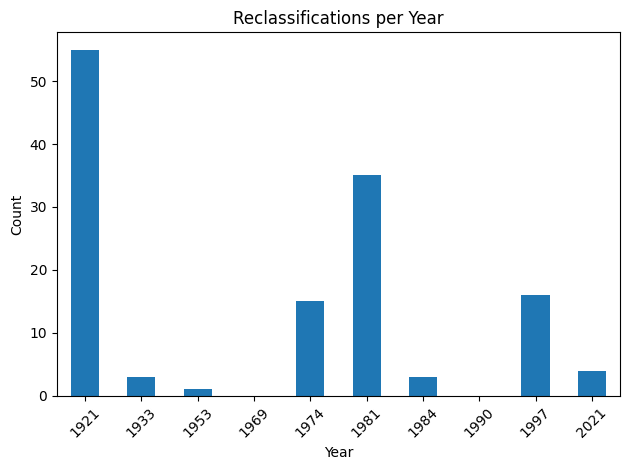

In [30]:
import matplotlib.pyplot as plt

reclass_counts.plot(kind='bar', title='Reclassifications per Year', ylabel='Count', xlabel='Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Step 3.3** Which Munro is the most remote?

In this step i will attempt to establish which Munro is the most remote. The most challenging part of this is to define the remoteness of a point on a map. After some research this can be calculated using a variety of methods like distance from a major road, distance from a population centre, or perhaps distance from public services like hospitals. Short story the way we calculate remotness is up to us and there is no universal way to calculate remoteness. **For the purposes of this exercise i will calculate remotness as the distance from the nearest population center based on the latitude and longitude.**

First i will create a copy of our cleaned dataset.

In [31]:
df_remotness = df_cleaned.copy()

The dataset currently has xcoord and ycoord using British National Grid (OSGB36), in order to accurately calculate the distances we will have to convert these values in to latitude and longitude.

In [32]:
def convert_osgb36_to_wgs84(easting, northing):
    """
    Converts OSGB36 (easting, northing) coordinates to WGS84 (latitude, longitude).
    """
    transformer = Transformer.from_crs("epsg:27700", "epsg:4326")
    lat, lon = transformer.transform(easting, northing)
    return lat, lon


We will use this method to calculate haversine distance, which essentially takes account of earth curvature when calculating distances.

In [33]:
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculates the great-circle distance between two points
    on the earth (specified in decimal degrees).
    """
    R = 6371  # Radius of Earth in kilometers
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad

    a = math.sin(delta_lat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(delta_lon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance = R * c
    return distance

This method will retrieve a list of population centers in Scotland along with their coordinates from a public Overpass API.

In [34]:
def get_scottish_population_centers():
    """
    Queries the Overpass API for all Scottish cities, towns, and villages.
    """
    bbox = "54.6, -7.9, 60.9, -0.6"
    overpass_query = f"""
    [out:json][timeout:60];
    (
      node["place"~"city|town|village"]({bbox});
    );
    out body;
    """
    overpass_url = "https://overpass-api.de/api/interpreter"
    print("Fetching population center data from OpenStreetMap...")
    try:
        response = requests.post(overpass_url, data=overpass_query)
        response.raise_for_status()
        data = response.json()
        population_centers = {}
        for element in data['elements']:
            if 'name' in element['tags']:
                name = element['tags']['name']
                lat = element['lat']
                lon = element['lon']
                population_centers[name] = (lat, lon)
        print(f"Found {len(population_centers)} population centers.")
        return population_centers
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None


Create columns to store latitude and longitude.

In [35]:
df_remotness['latitude'] = 0.0
df_remotness['longitude'] = 0.0

Execute a loop to convert our xcoord and ycoord to latitude and longitude

In [36]:
for index, row in df_remotness.iterrows():
    easting = row['xcoord']
    northing = row['ycoord']
    lat, lon = convert_osgb36_to_wgs84(easting, northing)
    df_remotness.loc[index, 'latitude'] = lat
    df_remotness.loc[index, 'longitude'] = lon

Retrieve a list of population centers

In [37]:
population_centers = get_scottish_population_centers()

Fetching population center data from OpenStreetMap...
Found 2814 population centers.


Add columns to store nearest population center and distance in KM from population center to location.

In [38]:
df_remotness['nearest_center'] = ''
df_remotness['min_distance_km'] = 0.0

And finally lets find the most remote record based on our calculations, i will also visualise this on the map using folium.

In [39]:
if population_centers:
    print("\nCalculating remoteness for each record...")
    for index, row in df_remotness.iterrows():
        user_lat = row['latitude']
        user_lon = row['longitude']

        nearest_center_name = None
        min_distance = float('inf')
        nearest_center_coords = (None, None)

        for city, coords in population_centers.items():
            distance = haversine_distance(user_lat, user_lon, coords[0], coords[1])
            if distance < min_distance:
                min_distance = distance
                nearest_center_name = city
                nearest_center_coords = coords

        df_remotness.loc[index, 'nearest_center'] = nearest_center_name
        df_remotness.loc[index, 'min_distance_km'] = min_distance
        df_remotness.loc[index, 'nearest_center_lat'] = nearest_center_coords[0]
        df_remotness.loc[index, 'nearest_center_lon'] = nearest_center_coords[1]


    print("\nRemoteness calculations complete.")

    # Identify the single most remote record as per the user's latest request
    df_sorted = df_remotness.sort_values(by='min_distance_km', ascending=False)
    most_remote_record = df_sorted.head(1)

    # print("\n*** The most remote record is: ***")
    # print(most_remote_record)

    # Step 4: Visualize the Result as a Map
    if not most_remote_record.empty:
        # Get the coordinates of the most remote location
        remote_lat = most_remote_record.iloc[0]['latitude']
        remote_lon = most_remote_record.iloc[0]['longitude']
        remote_name = most_remote_record.iloc[0]['name']

        # Get the coordinates of its nearest center
        center_lat = most_remote_record.iloc[0]['nearest_center_lat']
        center_lon = most_remote_record.iloc[0]['nearest_center_lon']
        center_name = most_remote_record.iloc[0]['nearest_center']

        # Create the Folium map centered on the most remote location
        m = folium.Map(location=[remote_lat, remote_lon], zoom_start=9, width=800, height=500)

        # Add marker for the most remote record
        tooltip_text = f"<b>{remote_name}</b><br>Height: {most_remote_record.iloc[0]['height_m']}m<br>Nearest Center: {center_name}<br>Remoteness: {most_remote_record.iloc[0]['min_distance_km']:.2f} km"
        popup_text = f"""
        <b>Name:</b> {remote_name}<br>
        <b>Height:</b> {most_remote_record.iloc[0]['height_m']}m<br>
        <b>Nearest Center:</b> {center_name}<br>
        <b>Distance:</b> {most_remote_record.iloc[0]['min_distance_km']:.2f} km
        """

        folium.Marker(
            location=[remote_lat, remote_lon],
            tooltip=tooltip_text,
            popup=popup_text,
            icon=folium.Icon(color='red', icon='info-sign') # Highlight the remote point
        ).add_to(m)

        # Add marker for the nearest population center
        if center_name: # Ensure a nearest center was found
            folium.Marker(
                location=[center_lat, center_lon],
                tooltip=f"<b>{center_name}</b> (Nearest Center)",
                icon=folium.Icon(color='blue', icon='home') # Use a different icon/color for the center
            ).add_to(m)

            # Draw a line between the most remote point and its nearest center
            folium.PolyLine(
                locations=[[remote_lat, remote_lon], [center_lat, center_lon]],
                color='green',
                weight=2.5,
                opacity=0.5
            ).add_to(m)
            print(f"\nDrawing a line from {remote_name} to {center_name}.")

        print("\nMap visualization has been created. It should appear below this output.")
        display(m)
    else:
        print("\nCould not visualize the data as no remote records were found.")
else:
    print("Could not proceed with calculations due to an API error. Please try again later.")


Calculating remoteness for each record...

Remoteness calculations complete.

Drawing a line from Spidean Mialach to Inverinate.

Map visualization has been created. It should appear below this output.
